# Beschrijvende statistieken

Om een overzicht te krijgen van de verdeling en variatie binnen de dataset, worden beschrijvende statistieken berekend. Dit omvat de gemiddelde waarden, mediaan, standaarddeviatie en interkwartielafstand van de engagement-metrics (views, likes, shares en comments). Deze statistieken bieden inzicht in de verdeling van de data en helpen bij het detecteren van mogelijke outliers of patronen in de dataset. Daarnaast worden visualisaties zoals boxplots en scatterplots gebruikt om trends tussen de variabelen te identificeren.

## Stap 1: Klaarzetten van de notebook.

In deze stap worden alle nodige libraries en data ingeladen en klaargezet.<br>
Dit vereenvoudigt het verdere verloop van de notebook.

In [30]:
# Importeer standaard libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Importeer de data
videos = pd.read_excel('../output/videos.xlsx')
comments = pd.read_excel('../output/comments.xlsx')

## Stap 2: Verkennen van de datasets.

### 2.1 Video Data

In [33]:
# Beschrijf de structuur van de dataset
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11 non-null     object 
 1   title                11 non-null     object 
 2   publish_date         11 non-null     object 
 3   duration             11 non-null     object 
 4   views                11 non-null     int64  
 5   likes                11 non-null     int64  
 6   dislikes             11 non-null     int64  
 7   shares               11 non-null     int64  
 8   comments             11 non-null     int64  
 9   engagement           11 non-null     float64
 10  views_24h            11 non-null     int64  
 11  views_1w             11 non-null     int64  
 12  views_2w             11 non-null     int64  
 13  views_1m             11 non-null     int64  
 14  views_2m             10 non-null     float64
 15  views_3m             3 non-null      float

In [34]:
# Bestudeer de basis statistieken van de dataset
videos.describe()

,views,likes,dislikes,shares,comments,engagement,views_24h,views_1w,views_2w,views_1m,...,comments_2m,comments_3m,engagement_rate_24h,engagement_rate_1w,engagement_rate_2w,engagement_rate_1m,engagement_rate_2m,engagement_rate_3m,is_beta,gender
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,10.00000,3.0,11.000000,11.000000,11.000000,11.000000,10.000000,3.000000,6.000000,11.000000
mean,2842.272727,63.545455,1.181818,40.363636,5.272727,3.734545,1153.545455,2101.636364,2356.545455,2542.545455,...,4.20000,3.0,4.350909,4.152727,4.027273,3.931818,3.826000,3.283333,0.500000,0.363636
std,1409.045996,29.561338,1.662419,31.187410,3.901049,0.559345,413.806081,1247.392663,1352.430210,1390.616868,...,1.75119,1.0,0.864170,0.860013,0.763022,0.654764,0.636661,0.474798,0.547723,0.504525
min,1136.000000,23.000000,0.000000,15.000000,1.000000,2.690000,560.000000,763.000000,855.000000,967.000000,...,2.00000,2.0,2.530000,2.610000,2.600000,2.890000,2.870000,2.750000,0.000000,0.000000
25%,1979.000000,42.500000,0.000000,22.000000,2.500000,3.440000,841.000000,1421.500000,1579.500000,1724.500000,...,3.00000,2.5,3.820000,3.535000,3.630000,3.600000,3.572500,3.095000,0.000000,0.000000
50%,2120.000000,52.000000,0.000000,27.000000,4.000000,3.660000,1086.000000,1461.000000,1652.000000,1805.000000,...,4.00000,3.0,4.530000,4.180000,4.060000,3.830000,3.715000,3.440000,0.500000,0.000000
75%,3624.000000,88.000000,2.000000,45.000000,7.500000,3.935000,1520.000000,2493.000000,2898.000000,3215.000000,...,5.75000,3.5,5.010000,4.605000,4.285000,4.085000,3.930000,3.550000,1.000000,1.000000
max,5949.000000,108.000000,5.000000,101.000000,13.000000,4.950000,1860.000000,5299.000000,5696.000000,5824.000000,...,7.00000,4.0,5.300000,5.640000,5.380000,5.170000,4.970000,3.660000,1.000000,1.000000


### 2.2 Comment Data

In [35]:
# Beschrijf de structuur van de dataset
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         56 non-null     int64 
 1   id                 56 non-null     object
 2   comment_id         56 non-null     object
 3   parent_comment_id  19 non-null     object
 4   author             56 non-null     object
 5   published_at       56 non-null     object
 6   like_count         56 non-null     int64 
 7   comment_nl         56 non-null     object
 8   is_reply           56 non-null     bool  
 9   comment_en         56 non-null     object
dtypes: bool(1), int64(2), object(7)
memory usage: 4.1+ KB


## Stap 3: Vergelijkende analyses

### 3.1 Video Data

In [37]:
# Globaal beeld - Bereken waarden voor de engagement-metrics
metrics = ['views', 'likes', 'dislikes', 'shares', 'comments', 'engagement']
cta_stats_mean = videos.groupby('has_CTA')[metrics].mean()
cta_stats_median = videos.groupby('has_CTA')[metrics].median()
cta_stats_std = videos.groupby('has_CTA')[metrics].std()
cta_stats = pd.DataFrame({
    'mean': cta_stats_mean.stack().round(3),
    'median': cta_stats_median.stack().round(3),
    'std': cta_stats_std.stack().round(3)
})
cta_stats

mean    median       std
has_CTA                                         
False   views       3456.600  4127.000  1949.227
        likes         76.400    99.000    38.501
        dislikes       0.600     0.000     0.894
        shares        57.800    50.000    40.616
        comments       5.800     4.000     5.450
        engagement     4.014     3.880     0.583
True    views       2330.333  2071.500   489.220
        likes         52.833    48.500    16.092
        dislikes       1.667     1.000     2.066
        shares        25.833    25.500     8.256
        comments       4.833     4.500     2.483
        engagement     3.502     3.545     0.459

In [38]:
# Visualiseer de verdeling van het gemiddelde
cta_mean_table = pd.DataFrame({
    'Without CTA': cta_stats_mean.loc[False].values.round(3),
    'Metric': cta_stats_mean.columns,
    'With CTA': cta_stats_mean.loc[True].values.round(3)
})
cta_mean_table

,Without CTA,Metric,With CTA
0,3456.600,views,2330.333
1,76.400,likes,52.833
2,0.600,dislikes,1.667
3,57.800,shares,25.833
4,5.800,comments,4.833
5,4.014,engagement,3.502


In [39]:
# Visualiseer de verdeling van de mediaan
cta_median_table = pd.DataFrame({
    'Without CTA': cta_stats_median.loc[False].values.round(3),
    'Metric': cta_stats_median.columns,
    'With CTA': cta_stats_median.loc[True].values.round(3)
})
cta_median_table

,Without CTA,Metric,With CTA
0,4127.00,views,2071.500
1,99.00,likes,48.500
2,0.00,dislikes,1.000
3,50.00,shares,25.500
4,4.00,comments,4.500
5,3.88,engagement,3.545


In [40]:
# Visualiseer de verdeling van de standaarddeviatie
cta_std_table = pd.DataFrame({
    'Without CTA': cta_stats_std.loc[False].values.round(3),
    'Metric': cta_stats_std.columns,
    'With CTA': cta_stats_std.loc[True].values.round(3)
})
cta_std_table

,Without CTA,Metric,With CTA
0,1949.227,views,489.220
1,38.501,likes,16.092
2,0.894,dislikes,2.066
3,40.616,shares,8.256
4,5.450,comments,2.483
5,0.583,engagement,0.459


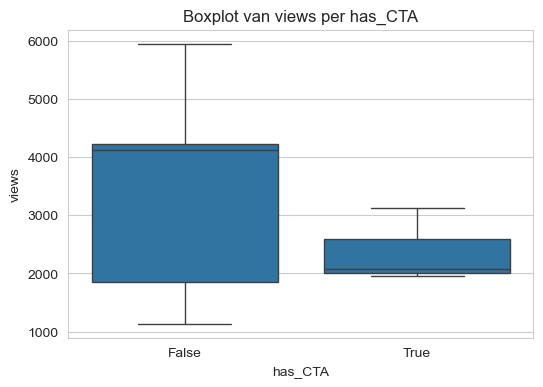

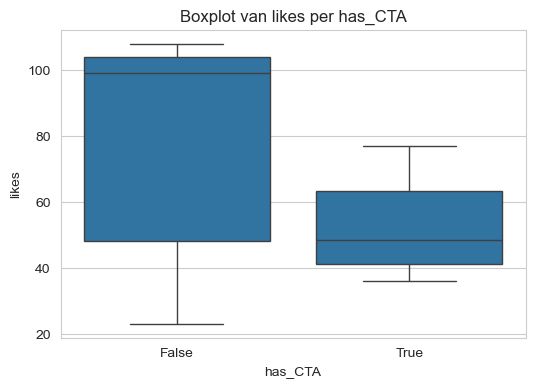

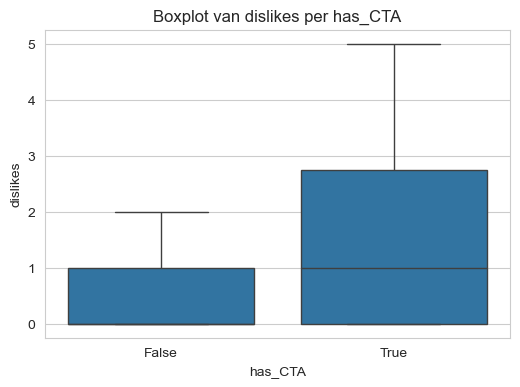

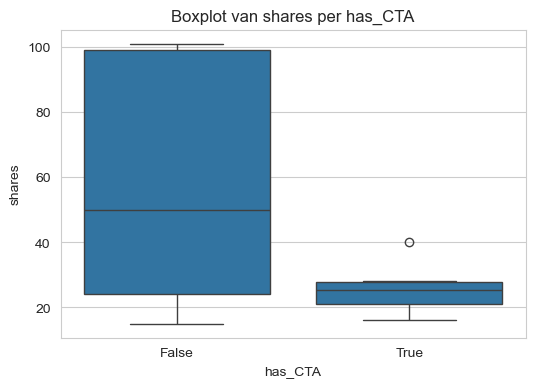

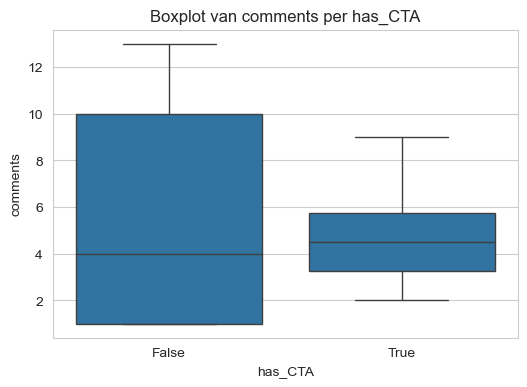

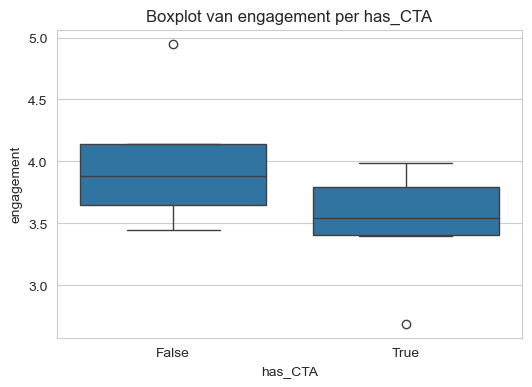

In [41]:
# Boxplots van de engagement-metrics per has_CTA
for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='has_CTA', y=metric, data=videos)
    plt.title(f"Boxplot van {metric} per has_CTA")
    plt.xlabel("has_CTA")
    plt.ylabel(metric)
    plt.show();

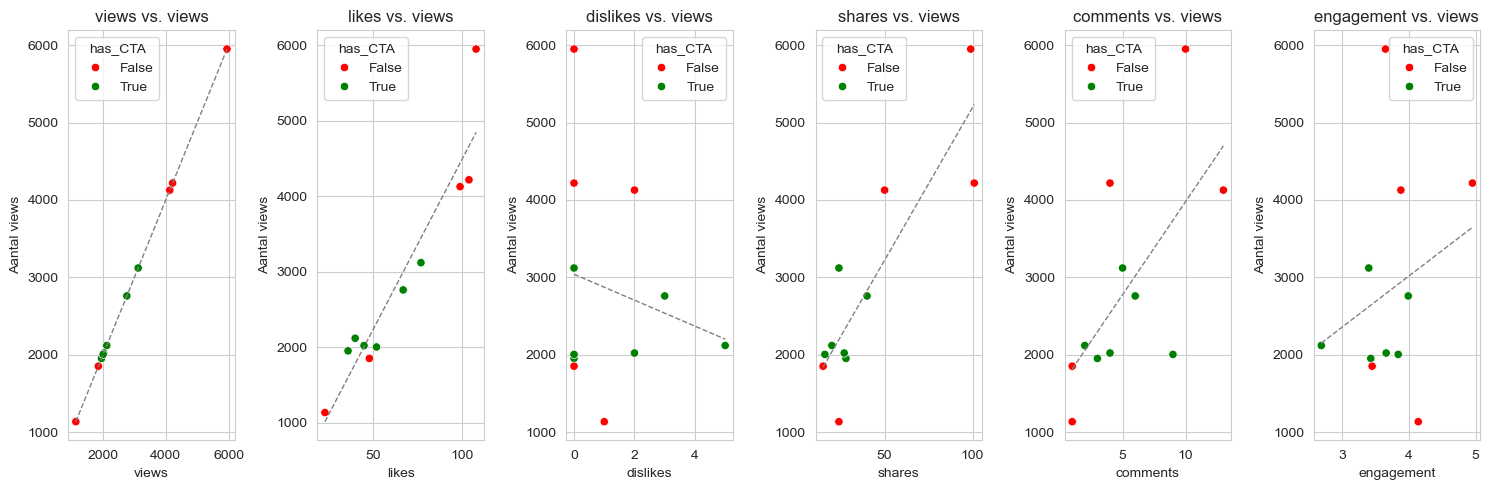

In [42]:
# Patronen bij views
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['views'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['views'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. views")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Aantal views")
plt.tight_layout()
plt.show()

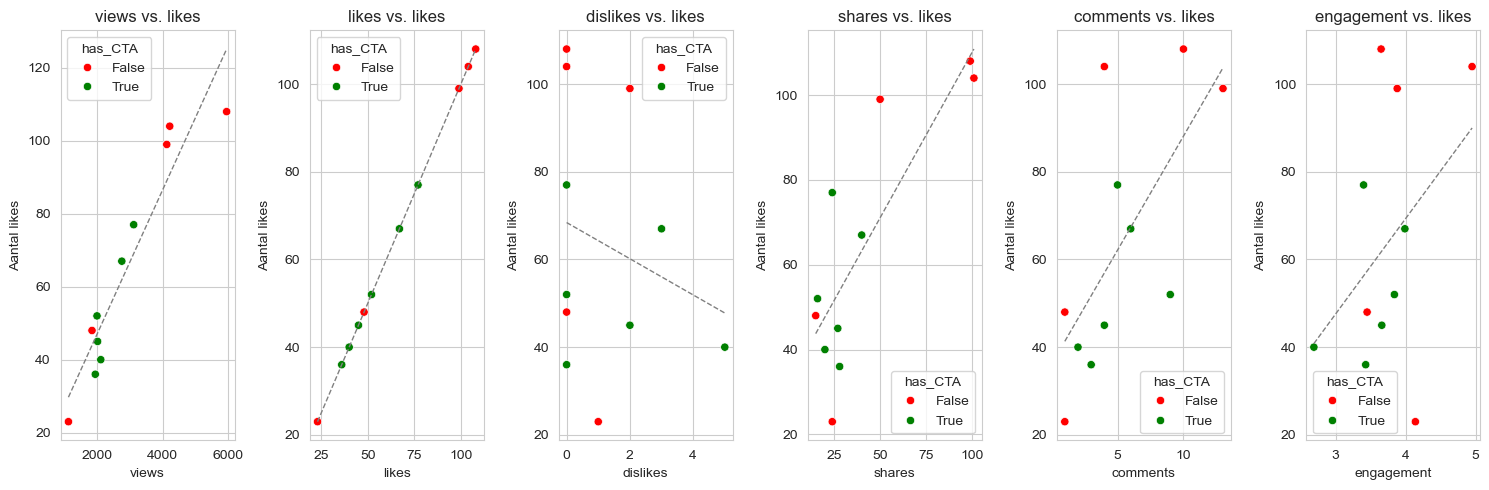

In [43]:
# Patronen bij likes
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['likes'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['likes'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. likes")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Aantal likes")
plt.tight_layout()
plt.show()

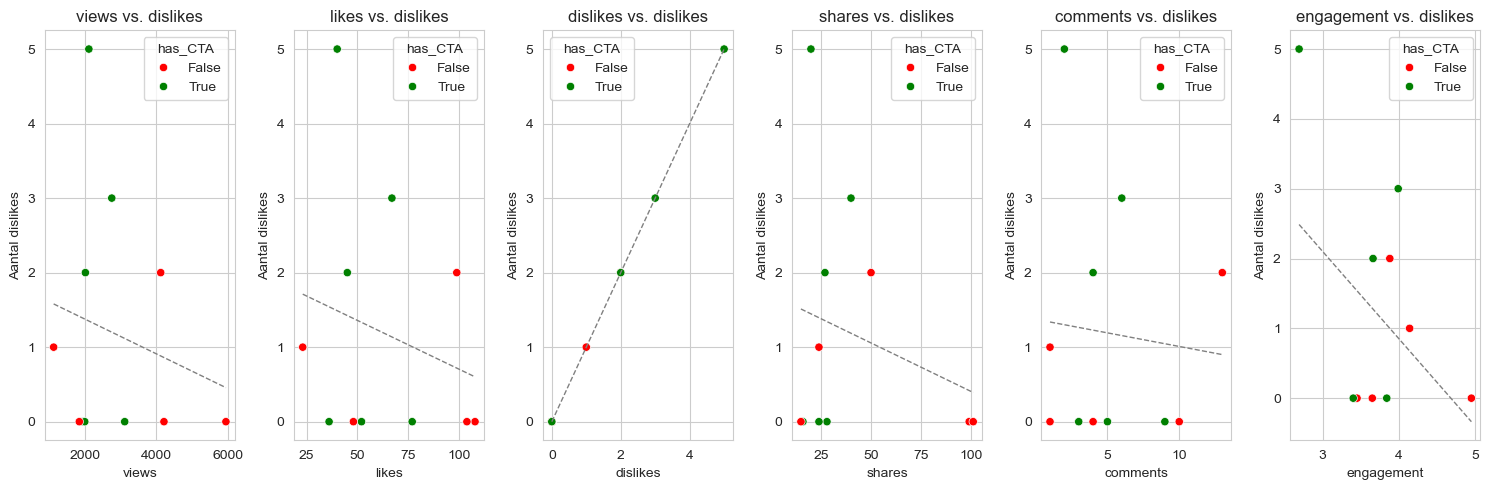

In [44]:
# Patronen bij dislikes
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['dislikes'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['dislikes'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. dislikes")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Aantal dislikes")
plt.tight_layout()
plt.show()

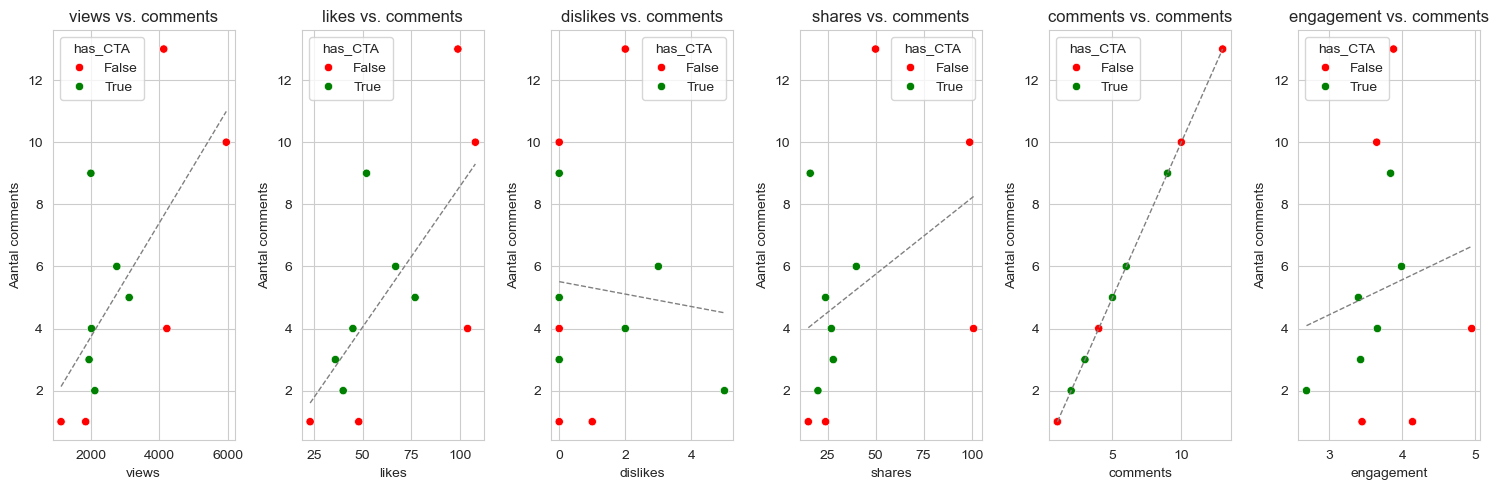

In [45]:
# Patronen bij comments
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['comments'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['comments'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. comments")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Aantal comments")
plt.tight_layout()
plt.show()

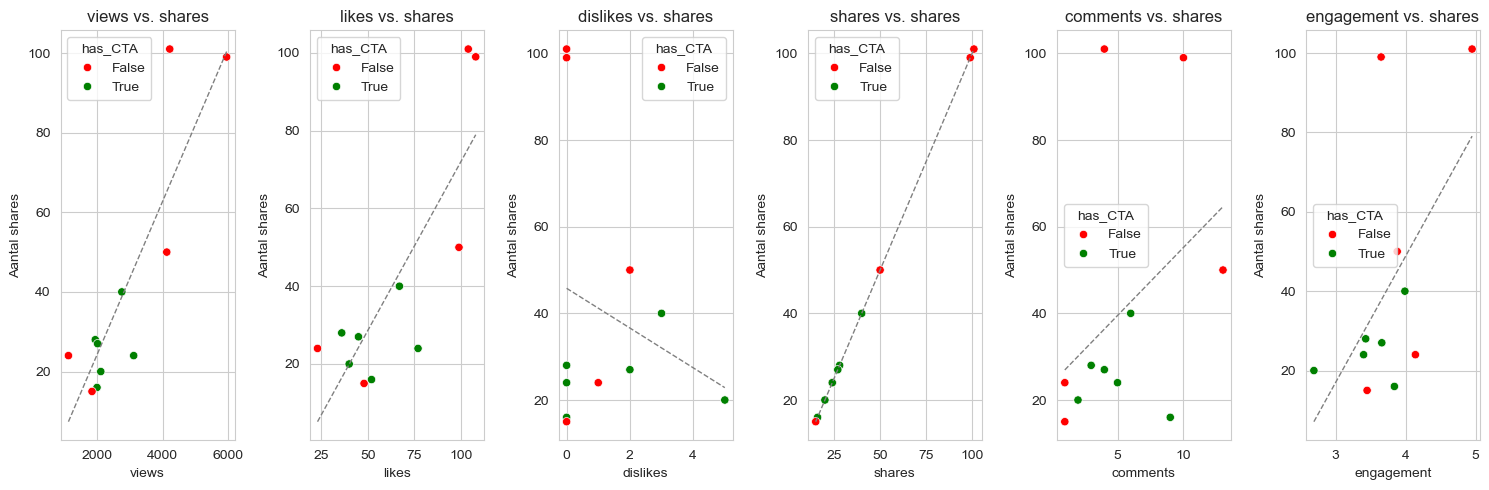

In [46]:
# Patronen bij shares
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['shares'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['shares'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. shares")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Aantal shares")
plt.tight_layout()
plt.show()

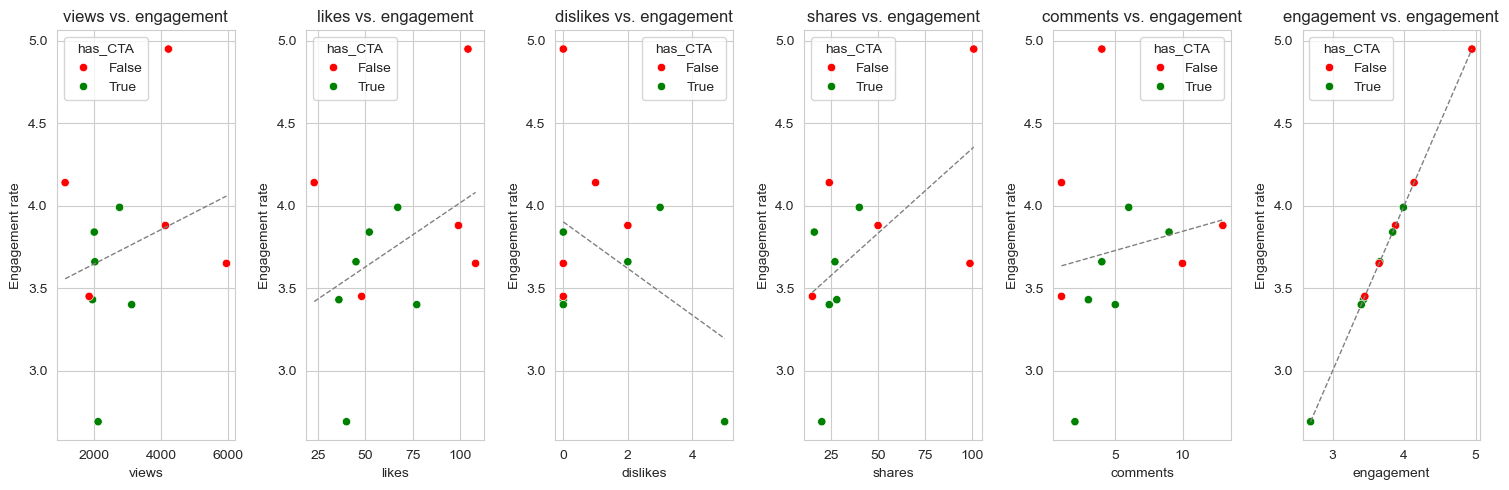

In [47]:
# Patronen bij engagement rate
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=videos[metric], y=videos['engagement'], hue=videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=videos[metric], y=videos['engagement'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f"{metric} vs. engagement")
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel("Engagement rate")
plt.tight_layout()
plt.show()